In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
health_data = pd.read_csv('/content/healthmonitoring.csv')
print(health_data.head())

   PatientID  Age  Gender  HeartRate BloodPressure  RespiratoryRate  \
0          1   69    Male  60.993428        130/85               15   
1          2   32    Male  98.723471        120/80               23   
2          3   78  Female  82.295377        130/85               13   
3          4   38  Female  80.000000        111/78               19   
4          5   41    Male  87.531693        120/80               14   

   BodyTemperature ActivityLevel  OxygenSaturation SleepQuality StressLevel  \
0        98.885236       resting              95.0    excellent         low   
1        98.281883       walking              97.0         good        high   
2        98.820286       resting              98.0         fair        high   
3        98.412594       running              98.0         poor    moderate   
4        99.369871       resting              98.0         good         low   

                    Timestamp  
0  2024-04-26 17:28:55.286711  
1  2024-04-26 17:23:55.286722  
2 

In [11]:
health_data.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
HeartRate,0
BloodPressure,0
RespiratoryRate,0
BodyTemperature,18
ActivityLevel,0
OxygenSaturation,163
SleepQuality,0


In [12]:
# calculate medians
median_body_temp = health_data['BodyTemperature'].median()
median_oxygen_sat = health_data['OxygenSaturation'].median()

# fill missing values
health_data['BodyTemperature'].fillna(median_body_temp, inplace=True)
health_data['OxygenSaturation'].fillna(median_oxygen_sat, inplace=True)

<ipython-input-12-6898628d8bee>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  health_data['BodyTemperature'].fillna(median_body_temp, inplace=True)
<ipython-input-12-6898628d8bee>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

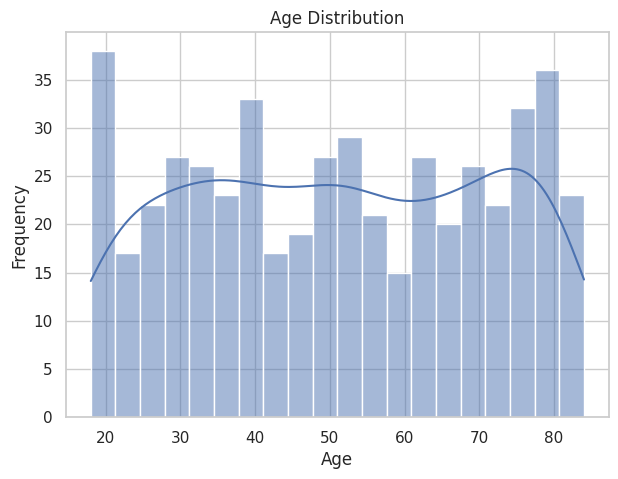

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.histplot(health_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


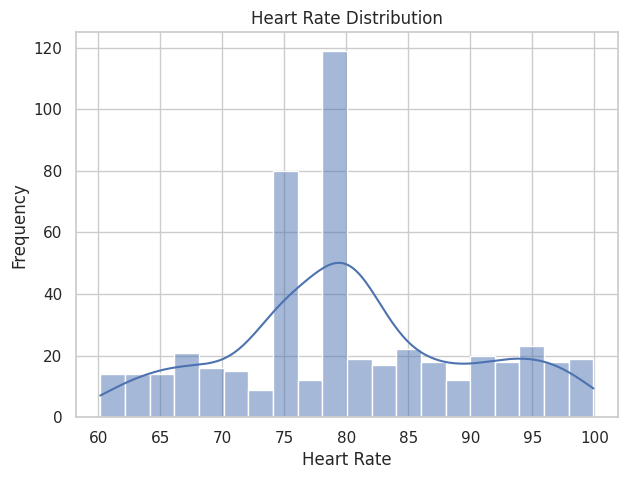

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.histplot(health_data['HeartRate'], bins=20, kde=True)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

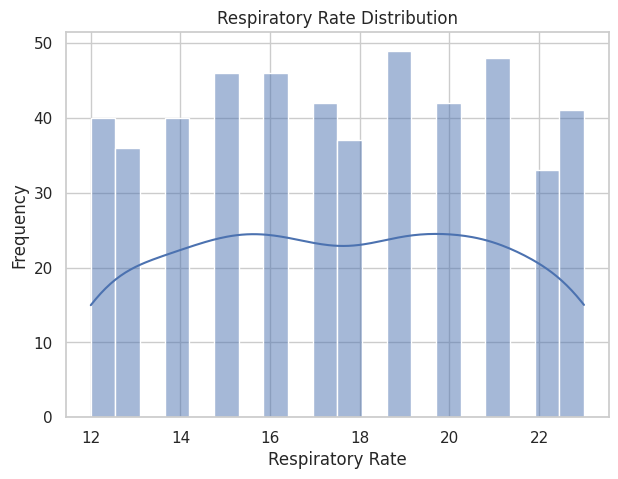

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.histplot(health_data['RespiratoryRate'], bins=20, kde=True)
plt.title('Respiratory Rate Distribution')
plt.xlabel('Respiratory Rate')
plt.ylabel('Frequency')
plt.show()

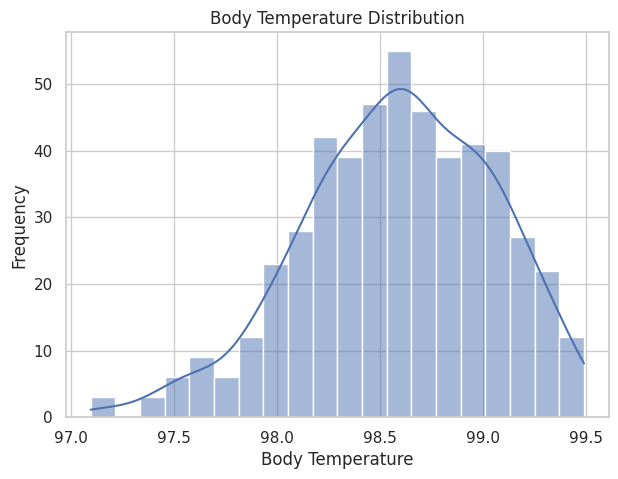

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.histplot(health_data['BodyTemperature'], bins=20, kde=True)
plt.title('Body Temperature Distribution')
plt.xlabel('Body Temperature')
plt.ylabel('Frequency')
plt.show()

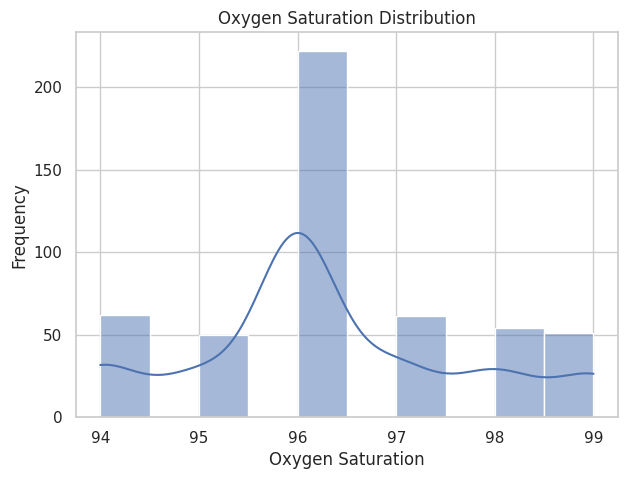

In [17]:
sns.set(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.histplot(health_data['OxygenSaturation'], bins=10, kde=True)
plt.title('Oxygen Saturation Distribution')
plt.xlabel('Oxygen Saturation')
plt.ylabel('Frequency')
plt.show()

In [18]:
print(summary_stats)

        PatientID         Age   HeartRate  RespiratoryRate  BodyTemperature  \
count  500.000000  500.000000  500.000000       500.000000       500.000000   
mean   250.500000   51.146000   80.131613        17.524000        98.584383   
std    144.481833   19.821566    9.606273         3.382352         0.461502   
min      1.000000   18.000000   60.169259        12.000000        97.094895   
25%    125.750000   34.000000   75.000000        15.000000        98.281793   
50%    250.500000   51.000000   80.000000        17.500000        98.609167   
75%    375.250000   69.000000   86.276413        20.000000        98.930497   
max    500.000000   84.000000   99.925508        23.000000        99.489150   

       OxygenSaturation  
count        500.000000  
mean          96.296000  
std            1.408671  
min           94.000000  
25%           96.000000  
50%           96.000000  
75%           97.000000  
max           99.000000  


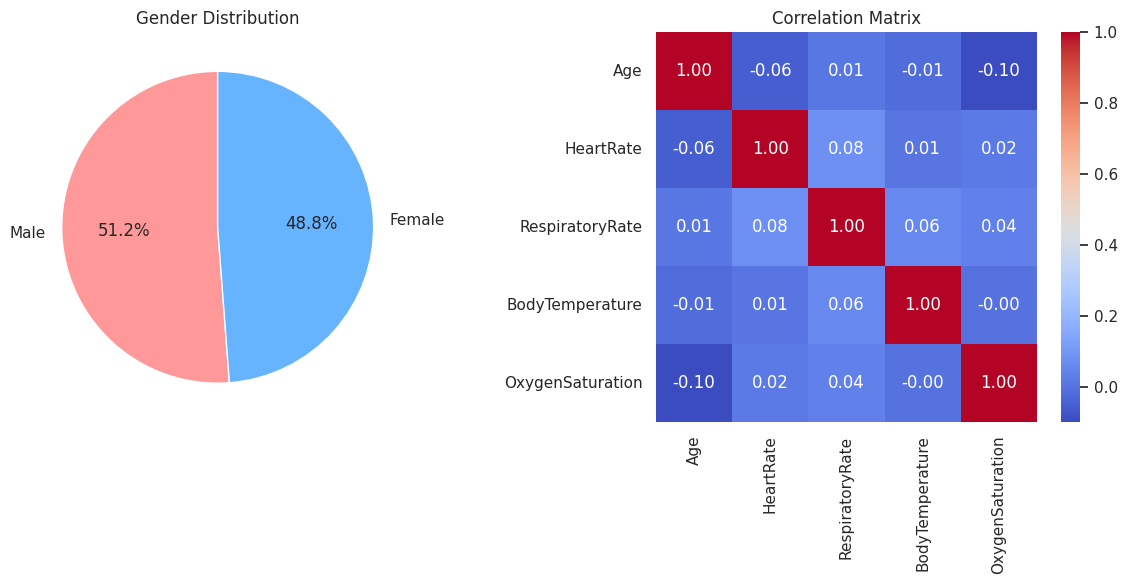

In [19]:
# gender Distribution
gender_counts = health_data['Gender'].value_counts()

# correlation Matrix for numerical health metrics
correlation_matrix = health_data[['Age', 'HeartRate', 'RespiratoryRate', 'BodyTemperature', 'OxygenSaturation']].corr()

# plotting the findings
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# gender distribution plot
gender_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[0].set_ylabel('')
axes[0].set_title('Gender Distribution')

# correlation matrix plot
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

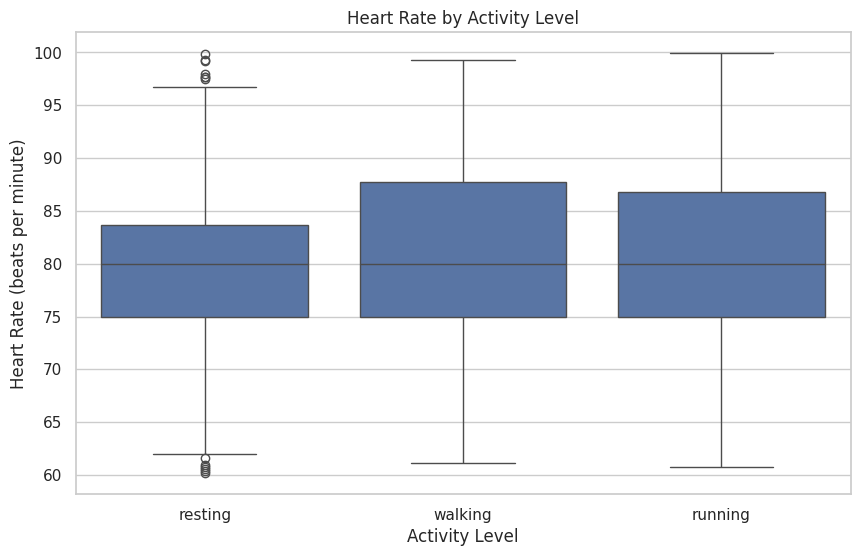

In [20]:
# heart Rate by activity level
plt.figure(figsize=(10, 6))
sns.boxplot(x='ActivityLevel', y='HeartRate', data=health_data)
plt.title('Heart Rate by Activity Level')
plt.ylabel('Heart Rate (beats per minute)')
plt.xlabel('Activity Level')
plt.show()

In [22]:
# Extracting systolic and diastolic blood pressure for analysis
health_data[['SystolicBP', 'DiastolicBP']] = health_data['BloodPressure'].str.split('/', expand=True).astype(int)


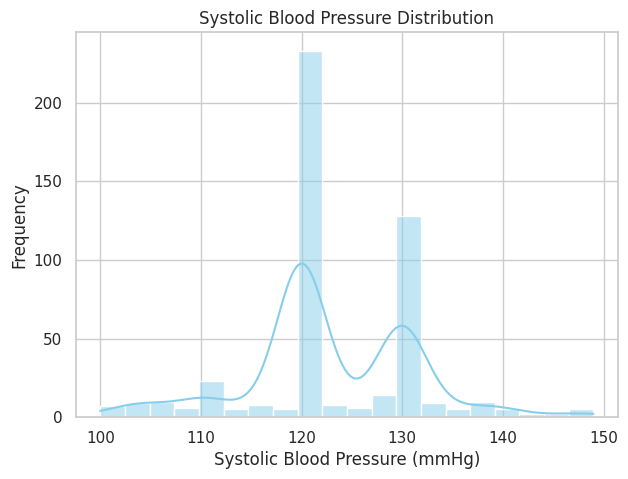

In [23]:
plt.figure(figsize=(7, 5))
sns.histplot(health_data['SystolicBP'], color="skyblue", kde=True)
plt.title('Systolic Blood Pressure Distribution')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.show()

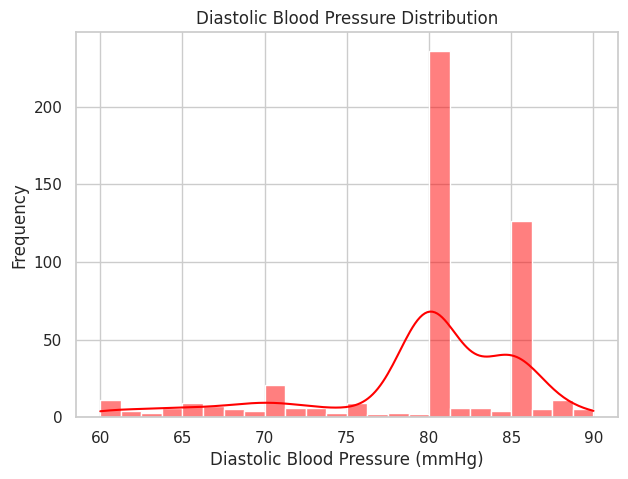

In [24]:
plt.figure(figsize=(7, 5))
sns.histplot(health_data['DiastolicBP'], color="red", kde=True)
plt.title('Diastolic Blood Pressure Distribution')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.show()

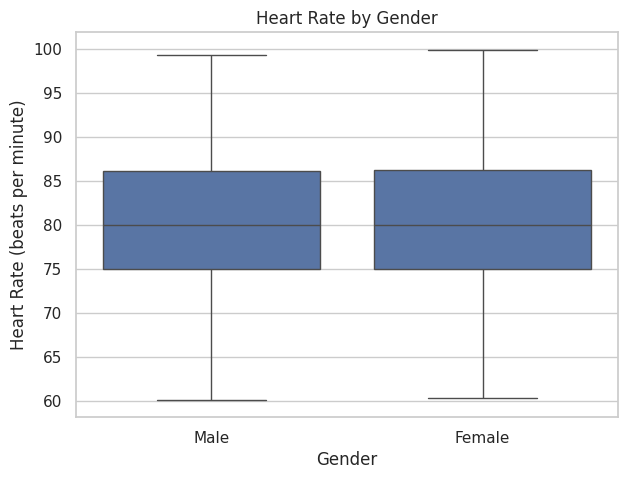

In [25]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Gender', y='HeartRate', data=health_data)
plt.title('Heart Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Heart Rate (beats per minute)')
plt.show()

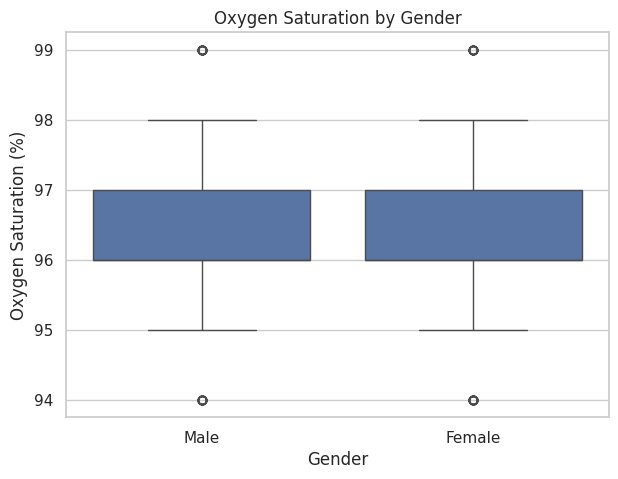

In [26]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Gender', y='OxygenSaturation', data=health_data)
plt.title('Oxygen Saturation by Gender')
plt.xlabel('Gender')
plt.ylabel('Oxygen Saturation (%)')
plt.show()

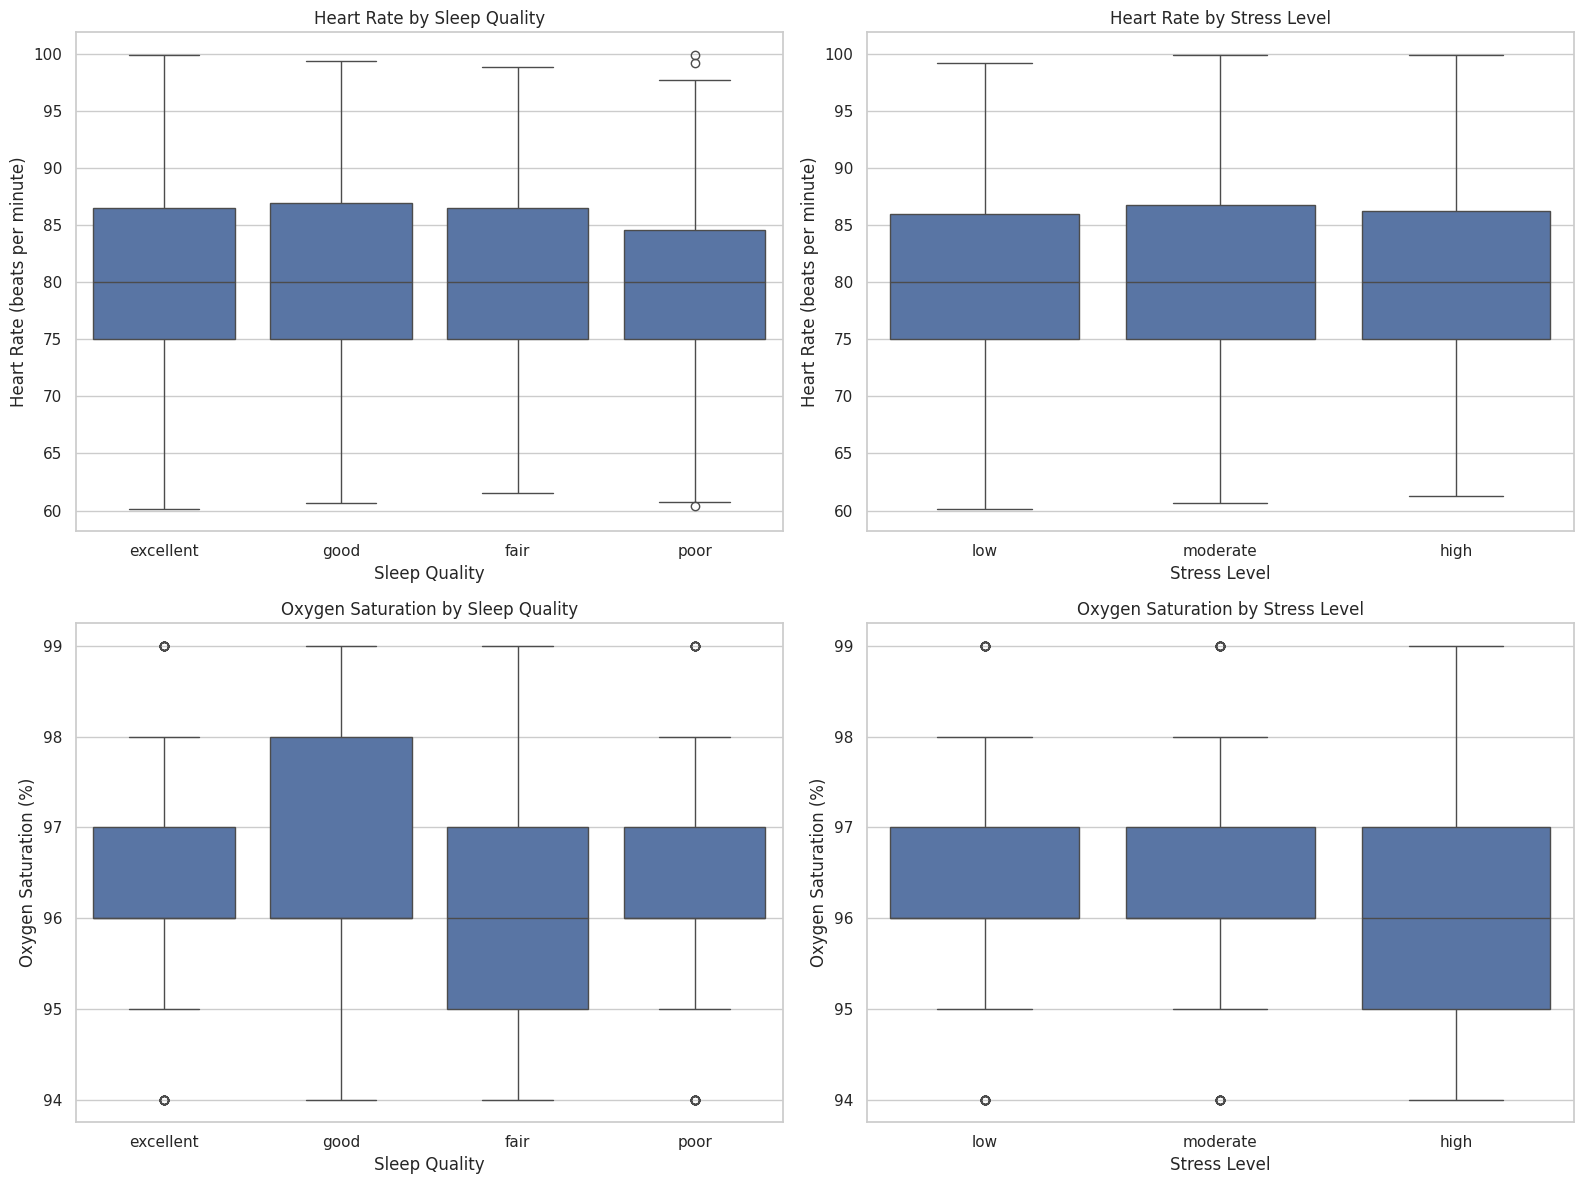

In [27]:
# categorizing sleep quality and stress level for better analysis
sleep_quality_order = ['excellent', 'good', 'fair', 'poor']
stress_level_order = ['low', 'moderate', 'high']

# creating plots to examine relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# heart rate by sleep quality
sns.boxplot(x='SleepQuality', y='HeartRate', data=health_data, order=sleep_quality_order, ax=axes[0, 0])
axes[0, 0].set_title('Heart Rate by Sleep Quality')
axes[0, 0].set_xlabel('Sleep Quality')
axes[0, 0].set_ylabel('Heart Rate (beats per minute)')

# heart rate by stress level
sns.boxplot(x='StressLevel', y='HeartRate', data=health_data, order=stress_level_order, ax=axes[0, 1])
axes[0, 1].set_title('Heart Rate by Stress Level')
axes[0, 1].set_xlabel('Stress Level')
axes[0, 1].set_ylabel('Heart Rate (beats per minute)')

# oxygen saturation by sleep quality
sns.boxplot(x='SleepQuality', y='OxygenSaturation', data=health_data, order=sleep_quality_order, ax=axes[1, 0])
axes[1, 0].set_title('Oxygen Saturation by Sleep Quality')
axes[1, 0].set_xlabel('Sleep Quality')
axes[1, 0].set_ylabel('Oxygen Saturation (%)')

# oxygen saturation by stress level
sns.boxplot(x='StressLevel', y='OxygenSaturation', data=health_data, order=stress_level_order, ax=axes[1, 1])
axes[1, 1].set_title('Oxygen Saturation by Stress Level')
axes[1, 1].set_xlabel('Stress Level')
axes[1, 1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

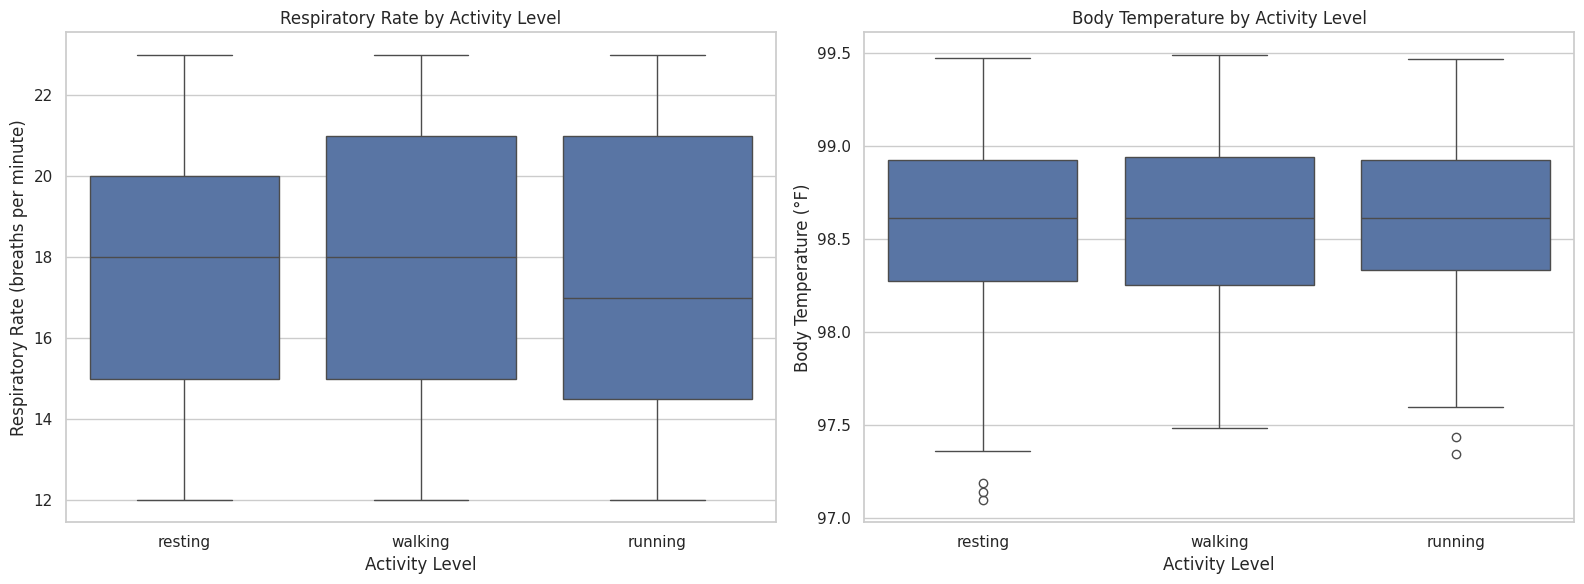

In [28]:
# creating plots to examine relationships between activity level and other health metrics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# respiratory rate by activity level
sns.boxplot(x='ActivityLevel', y='RespiratoryRate', data=health_data, ax=axes[0])
axes[0].set_title('Respiratory Rate by Activity Level')
axes[0].set_xlabel('Activity Level')
axes[0].set_ylabel('Respiratory Rate (breaths per minute)')

# body temperature by activity level
sns.boxplot(x='ActivityLevel', y='BodyTemperature', data=health_data, ax=axes[1])
axes[1].set_title('Body Temperature by Activity Level')
axes[1].set_xlabel('Activity Level')
axes[1].set_ylabel('Body Temperature (°F)')

plt.tight_layout()
plt.show()

In [31]:
# Function to classify age groups
def classify_age(age):
    if age <= 35:
        return 'Young'
    elif age <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'

# Function to determine blood pressure category
def categorize_bp(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Elevated'
    elif 140 <= systolic < 160 or 90 <= diastolic < 100:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

# Function to assess heart rate category
def classify_heart_rate(hr):
    if hr < 60:
        return 'Low'
    elif hr <= 100:
        return 'Normal'
    else:
        return 'High'

# Function to evaluate oxygen saturation levels
def categorize_oxygen(oxygen_level):
    return 'Low' if oxygen_level < 94 else 'Normal'

# Applying classification functions to the dataset
health_data['AgeCategory'] = health_data['Age'].apply(classify_age)
health_data['BloodPressureCategory'] = health_data.apply(lambda row: categorize_bp(row['SystolicBP'], row['DiastolicBP']), axis=1)
health_data['HeartRateCategory'] = health_data['HeartRate'].apply(classify_heart_rate)
health_data['OxygenCategory'] = health_data['OxygenSaturation'].apply(categorize_oxygen)

# Display a preview of the modified dataset
print(health_data[['Age', 'AgeCategory', 'SystolicBP', 'DiastolicBP',
                   'BloodPressureCategory', 'HeartRate', 'HeartRateCategory',
                   'OxygenSaturation', 'OxygenCategory']].head())


   Age  AgeCategory  SystolicBP  DiastolicBP BloodPressureCategory  HeartRate  \
0   69       Senior         130           85              Elevated  60.993428   
1   32        Young         120           80              Elevated  98.723471   
2   78       Senior         130           85              Elevated  82.295377   
3   38  Middle-aged         111           78                Normal  80.000000   
4   41  Middle-aged         120           80              Elevated  87.531693   

  HeartRateCategory  OxygenSaturation OxygenCategory  
0            Normal              95.0         Normal  
1            Normal              97.0         Normal  
2            Normal              98.0         Normal  
3            Normal              98.0         Normal  
4            Normal              98.0         Normal  


<Figure size 800x600 with 0 Axes>

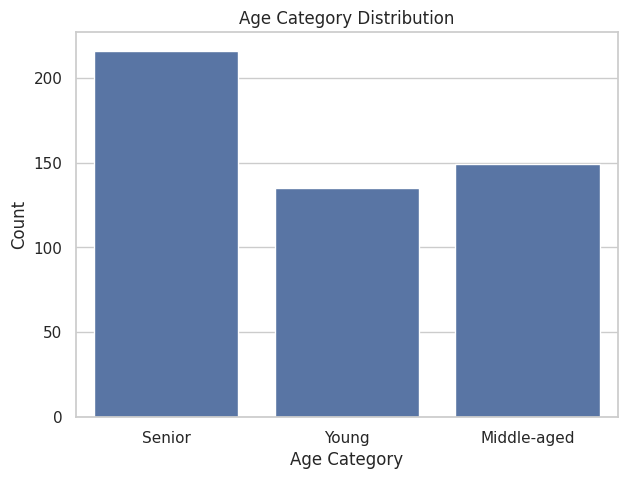

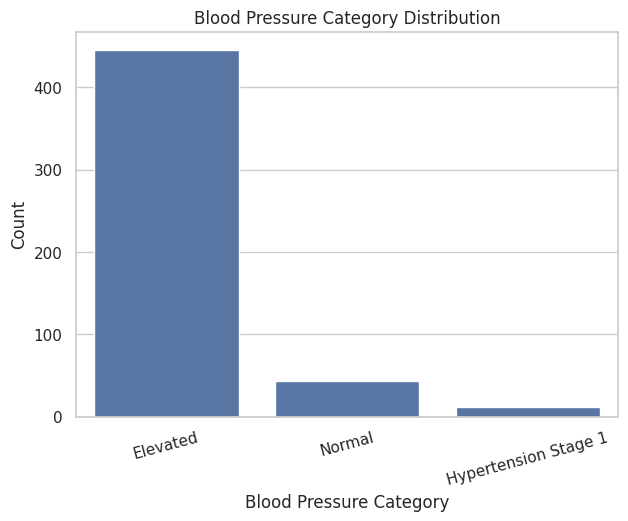

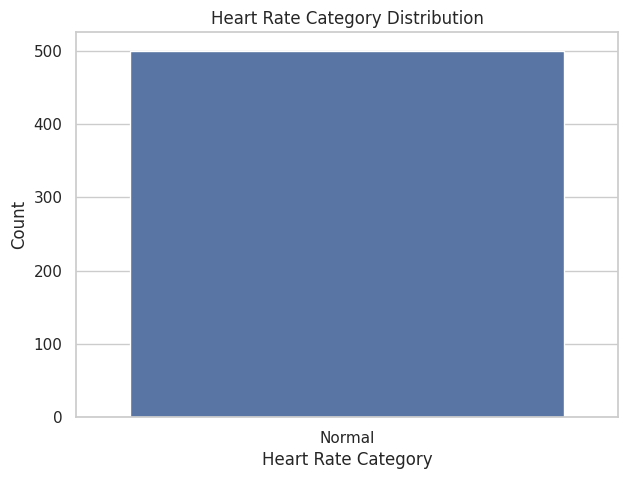

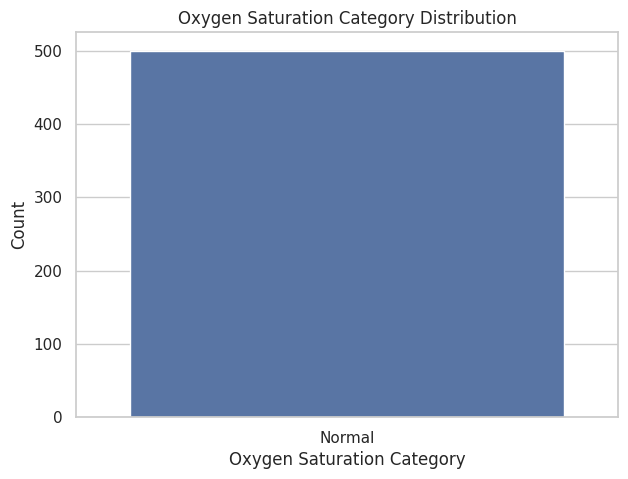

In [33]:
# Set figure size
plt.figure(figsize=(8, 6))

# Count plot for Age Category
plt.figure(figsize=(7, 5))
sns.countplot(x='AgeCategory', data=health_data)
plt.title('Age Category Distribution')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

# Count plot for Blood Pressure Category
plt.figure(figsize=(7, 5))
sns.countplot(x='BloodPressureCategory', data=health_data)
plt.title('Blood Pressure Category Distribution')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.xticks(rotation=15)  # Rotate labels for better visibility
plt.show()

# Count plot for Heart Rate Category
plt.figure(figsize=(7, 5))
sns.countplot(x='HeartRateCategory', data=health_data)
plt.title('Heart Rate Category Distribution')
plt.xlabel('Heart Rate Category')
plt.ylabel('Count')
plt.show()

# Count plot for Oxygen Saturation Category
plt.figure(figsize=(7, 5))
sns.countplot(x='OxygenCategory', data=health_data)
plt.title('Oxygen Saturation Category Distribution')
plt.xlabel('Oxygen Saturation Category')
plt.ylabel('Count')
plt.show()
